In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

### get_base_filepath()

Access the filepath for th ebase folder of the project. 
From here, any other asset of the project can be located.

In [2]:
def get_base_filepath():
    '''
    Access the filepath for the base folder of the project
    
    Input: None
    
    Output: The filepath to the root of the folder
    '''
    # Get current directory
    os.path.abspath(os.curdir)

    # Go up a directory level
    os.chdir('..')

    # Set baseline filepath to the project folder directory
    base_folder_filepath = os.path.abspath(os.curdir)
    return base_folder_filepath

### normalize()

Normalizes a Series

**Input:** A feature of type Series

**Output:** The normalized feature of type Series

In [3]:
def normalize(feature):
    '''
    This function normalizes a Series
    
    Input: A feature of type Series
    
    Output: The normalized feature of type Series
    '''
    # If the standard deviation is 0, do not divide by it
    if feature.std() == 0:
        return feature - feature.mean()
    
    # Otherwise, divide by the standard deviation
    return (feature - feature.mean())/feature.std()

### normalize_features()

Normalizes all features in a given dataframe. This will normalize ALL features, so ensure that the inputted dataframe consists only of numeric values.

**Input:** A dataframe to normalize

**Output:** A normalized dataframe

In [4]:
def normalize_features(df):
    '''
    This function normalizes all features in a dataframe
    
    Input: A pandas dataframe
    
    Output: The normalized dataframe
    '''
    for column in df.columns:
        df[column] = normalize(df[column])
    return df

In [5]:
def print_confusion_matrix(cmf, name):
    sns.heatmap(cmf,
            annot=True,
            fmt='g',
        )
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix for ' + name,fontsize=17)
    plt.show()

## Import File

Locate the file using its filepath from the base folder and load the file as a dataframe.

In [6]:
# The folder for the project
base_folder_filepath = get_base_filepath()

# Phenotypic data site folder
filepath_train = base_folder_filepath + '\\Data\\Phenotypic\\2023.7.11-Cleaned_Phenotypic_Training_Sites.csv'
filepath_ohsu = base_folder_filepath + '\\Data\\Phenotypic\\Sites\\OHSU_phenotypic.csv'
filepath_kki = base_folder_filepath + '\\Data\\Phenotypic\\Sites\\KKI_phenotypic.csv'

# Dataframe from filepath
df_train = pd.read_csv(filepath_train, index_col='ID')
df_ohsu = pd.read_csv(filepath_ohsu, index_col='ScanDir ID')
df_kki = pd.read_csv(filepath_kki, index_col='ScanDir ID')

In [7]:
df_train_noIQs = df_train.copy()
df_train_noIQs = df_train_noIQs.drop(['Verbal IQ', 'Performance IQ'], axis=1)

X_train = df_train.drop('DX', axis=1)
y_train = df_train['DX']

X_noIQs_train = df_train_noIQs.drop('DX', axis=1)
y_noIQs_train = df_train['DX']

clf = KNeighborsClassifier().fit(X_train, y_train)
clf_noIQs = KNeighborsClassifier().fit(X_noIQs_train, y_noIQs_train)

In [8]:
df_ohsu['IQ'] = df_ohsu['Full4 IQ']
df_ohsu = df_ohsu[df_train.columns]
df_ohsu = df_ohsu.drop(['Verbal IQ', 'Performance IQ'], axis=1)

In [9]:
X_ohsu = df_ohsu.drop('DX', axis=1)
y_ohsu = df_ohsu['DX']

preds_ohsu = clf_noIQs.predict(X_ohsu)

acc_ohsu = accuracy_score(preds_ohsu, y_ohsu)
acc_ohsu

0.5949367088607594

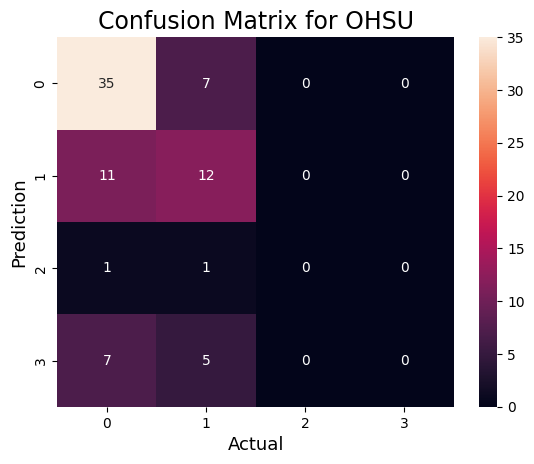

In [10]:
cfm_ohsu = confusion_matrix(y_ohsu, preds_ohsu, labels=clf_noIQs.classes_)

print_confusion_matrix(cfm_ohsu, 'OHSU')

In [11]:
df_kki['IQ'] = df_kki['Full4 IQ']
df_kki = df_kki[df_train.columns]
df_kki_noIQs = df_kki.drop(['Performance IQ', 'Verbal IQ'], axis=1)

In [12]:
X_kki = df_kki.drop('DX', axis=1)
y_kki = df_kki['DX']

preds_kki = clf.predict(X_kki)

acc_kki = accuracy_score(preds_kki, y_kki)
acc_kki

0.5421686746987951

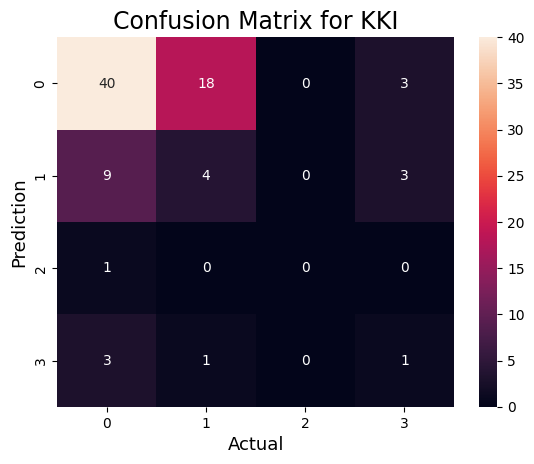

In [13]:
cfm_kki = confusion_matrix(y_kki, preds_kki, labels=clf.classes_)

print_confusion_matrix(cfm_kki, 'KKI')

In [14]:
X_kki_noIQs = df_kki_noIQs.drop('DX', axis=1)

preds_kki_noIQs = clf_noIQs.predict(X_kki_noIQs)

acc_kki_noIQs = accuracy_score(preds_kki_noIQs, y_kki)
acc_kki_noIQs

0.6385542168674698

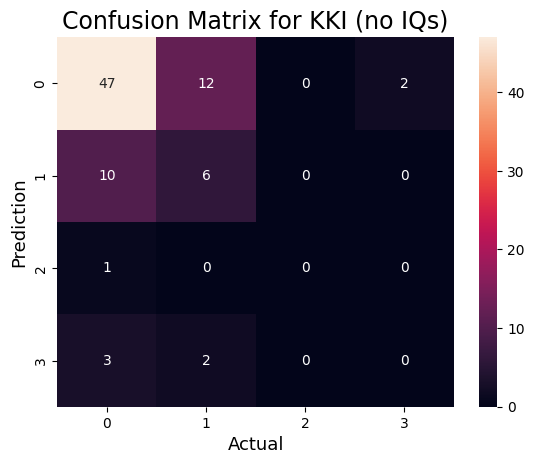

In [15]:
cfm_kki_noIQs = confusion_matrix(y_kki, preds_kki_noIQs, labels=clf.classes_)

print_confusion_matrix(cfm_kki_noIQs, 'KKI (no IQs)')

In [16]:
df_train_binary = df_train.copy()
df_train_noIQs_binary = df_train_noIQs.copy()

df_train_binary['DX'].loc[df_train_binary['DX'] > 0] = 1
df_train_noIQs_binary['DX'].loc[df_train_noIQs_binary['DX'] > 0] = 1

X_train_noIQs_binary = df_train_noIQs_binary.drop('DX', axis=1)
X_train_binary = df_train_binary.drop('DX', axis=1)

y_train_noIQs_binary = df_train_noIQs_binary['DX']
y_train_binary = df_train_binary['DX']

X_train_noIQs_binary = normalize_features(X_train_noIQs_binary)
X_train_binary = normalize_features(X_train_binary)

clf_noIQs_binary = SVC().fit(X_train_noIQs_binary, y_train_noIQs_binary)
clf_binary = SVC().fit(X_train_binary, y_train_binary)

C:\Users\taylo\AppData\Local\Temp\ipykernel_20160\4064331885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_binary['DX'].loc[df_train_binary['DX'] > 0] = 1
C:\Users\taylo\AppData\Local\Temp\ipykernel_20160\4064331885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_noIQs_binary['DX'].loc[df_train_noIQs_binary['DX'] > 0] = 1


In [17]:
df_ohsu_binary = df_ohsu.copy()
df_ohsu_binary['DX'].loc[df_ohsu_binary['DX'] > 0] = 1

C:\Users\taylo\AppData\Local\Temp\ipykernel_20160\3710078053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ohsu_binary['DX'].loc[df_ohsu_binary['DX'] > 0] = 1


In [18]:
X_ohsu_binary = df_ohsu_binary.drop('DX', axis=1)
y_ohsu_binary = df_ohsu_binary['DX']

X_ohsu_binary = normalize_features(X_ohsu_binary)

preds_ohsu_binary = clf_noIQs_binary.predict(X_ohsu_binary)

acc_ohsu_binary = accuracy_score(preds_ohsu_binary, y_ohsu_binary)
acc_ohsu_binary

0.7341772151898734

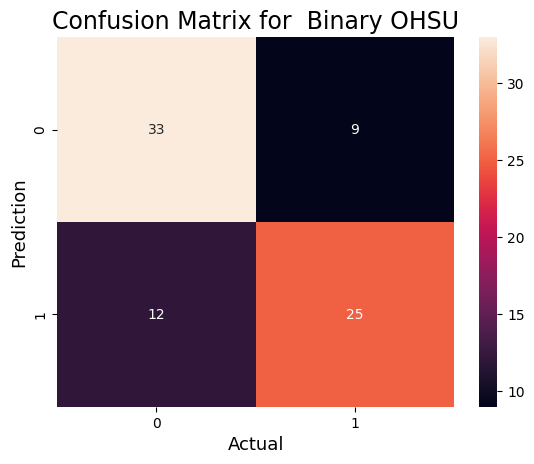

In [19]:
cfm_ohsu_binary = confusion_matrix(y_ohsu_binary, preds_ohsu_binary, labels=clf_noIQs_binary.classes_)

print_confusion_matrix(cfm_ohsu_binary, ' Binary OHSU')

In [20]:
df_kki_binary = df_kki.copy()
df_kki_binary['DX'].loc[df_kki_binary['DX'] > 0] = 1

df_kki_noIQs_binary = df_kki_noIQs.copy()
df_kki_noIQs_binary['DX'].loc[df_kki_noIQs_binary['DX'] > 0] = 1

C:\Users\taylo\AppData\Local\Temp\ipykernel_20160\3341513627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kki_binary['DX'].loc[df_kki_binary['DX'] > 0] = 1
C:\Users\taylo\AppData\Local\Temp\ipykernel_20160\3341513627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kki_noIQs_binary['DX'].loc[df_kki_noIQs_binary['DX'] > 0] = 1


In [21]:
X_kki_binary = df_kki_binary.drop('DX', axis=1)
y_kki_binary = df_kki_binary['DX']

X_kki_binary = normalize_features(X_kki_binary)

preds_kki_binary = clf_binary.predict(X_kki_binary)

acc_kki_binary = accuracy_score(preds_kki_binary, y_kki_binary)
acc_kki_binary

0.6746987951807228

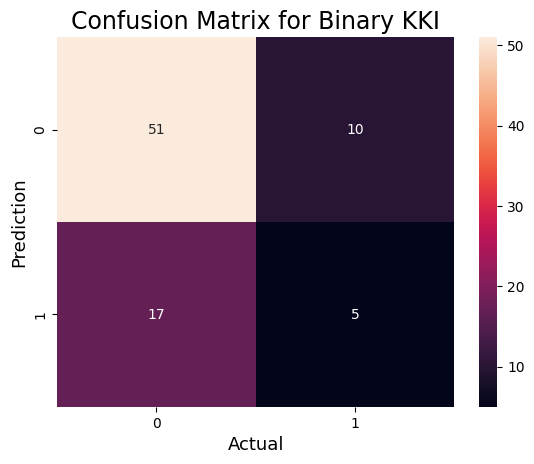

In [22]:
cfm_kki_binary = confusion_matrix(y_kki_binary, preds_kki_binary, labels=clf_binary.classes_)

print_confusion_matrix(cfm_kki_binary, 'Binary KKI')

In [23]:
X_kki_noIQs_binary = df_kki_noIQs_binary.drop('DX', axis=1)

X_kki_noIQs_binary = normalize_features(X_kki_noIQs_binary)

preds_kki_noIQs_binary = clf_noIQs_binary.predict(X_kki_noIQs_binary)

acc_kki_noIQs_binary = accuracy_score(preds_kki_noIQs_binary, y_kki_binary)
acc_kki_noIQs_binary

0.4939759036144578

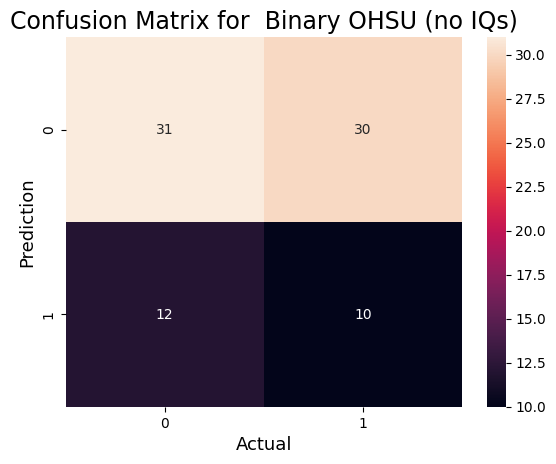

In [24]:
cfm_kki_noIQs_binary = confusion_matrix(y_kki_binary, preds_kki_noIQs_binary, labels=clf_noIQs_binary.classes_)

print_confusion_matrix(cfm_kki_noIQs_binary, 'Binary OHSU (no IQs)')